In [45]:
cd /home/andre/Projects/stocks/data

/home/andre/Projects/stocks/data


In [46]:
import pandas as pd
import numpy as np
import datetime
import calendar
import time
import struct

In [47]:
predictions = pd.read_pickle('4k_daemon.pickle')

In [48]:
predictions.head()

,ypred
indx,
2013-12-16 12:29:00,-1
2013-12-16 12:32:00,-1
2013-12-16 12:37:00,-1
2013-12-16 12:38:00,-1
2013-12-16 13:01:00,-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f1f762438>]],
      dtype=object)

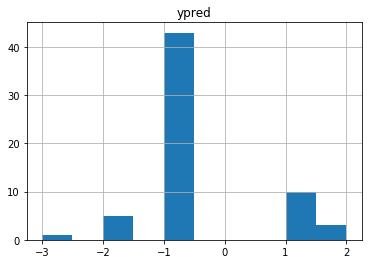

In [49]:
predictions.hist()

In [50]:
%matplotlib inline

In [51]:
# predictions.hist()

**Create a predictions file with  {date, direction} array**

In [52]:
# create long datetime
predictions['datetime'] = list(map(lambda x: calendar.timegm(x.timetuple()), predictions.index))
predictions.datetime = predictions.datetime.astype(np.int64)
predictions.ypred = predictions.ypred.astype(np.int32)

In [53]:
predictions[:5]

,ypred,datetime
indx,,
2013-12-16 12:29:00,-1,1387196940
2013-12-16 12:32:00,-1,1387197120
2013-12-16 12:37:00,-1,1387197420
2013-12-16 12:38:00,-1,1387197480
2013-12-16 13:01:00,-1,1387198860


In [54]:
predictions.tail()

,ypred,datetime
indx,,
2014-01-02 12:23:00,-1,1388665380
2014-01-02 12:33:00,-3,1388665980
2014-01-02 12:41:00,1,1388666460
2014-01-02 13:44:00,-2,1388670240
2014-01-02 14:53:00,1,1388674380


In [55]:
len(predictions)

62

In [57]:
cd /home/andre/.wine/drive_c/users/andre/Application Data/MetaQuotes/Terminal/Common/Files

/home/andre/.wine/drive_c/users/andre/Application Data/MetaQuotes/Terminal/Common/Files


In [58]:
# Writing a prediction for mql5 read
# https://docs.python.org/2/library/struct.html
with open('test_predictions.bin','wb') as f:
    # struct of long and int 8+4 = 12 bytes
    for i in range(len(predictions)):
        dbytes = struct.pack('<Qi', predictions.datetime.iloc[i], predictions.ypred.iloc[i])
        f.write(dbytes)

In [59]:
len(predictions)

62